In [ ]:
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

Mounted at /content/drive


Load data and preprocessing

In [ ]:
import pandas as pd
import os

# Load the Policy Metadata file
csv_file = 'directory of policy meta data file'

# Create a dictionary to map ID to state and action year
id_to_state_and_year = dict(zip(metadata['ID'].astype(str), zip(metadata['State / Jurisdiction'], metadata['Action_Year'])))

# Function to match txt file names with state and action year
def get_state_and_year_for_file(file_name, id_to_state_and_year):
    # Handle cases with letters in file names (e.g., 11a, 11b)
    base_file_name = ''.join([char for char in file_name if char.isdigit()])
    return id_to_state_and_year.get(base_file_name)

text_files_directory = "Directory containing the text files"
# Create a DataFrame to store file names, their states, and action years
file_state_year_data = []
for file_name in os.listdir(text_files_directory):
    if file_name.endswith('.txt'):
        state_year_info = get_state_and_year_for_file(file_name.split('.')[0], id_to_state_and_year)
        if state_year_info:
            state, action_year = state_year_info
            file_state_year_data.append({'File Name': file_name, 'State': state, 'Action Year': action_year})

# Convert to DataFrame
file_state_df = pd.DataFrame(file_state_year_data)
file_state_df['Action Year']=file_state_df['Action Year'].astype("int")

print(file_state_df)


    File Name          State  Action Year
0       3.txt         Alaska         2016
1       4.txt         Alaska         2018
2       7.txt       Arkansas         2017
3       8.txt       Arkansas         2015
4      10.txt        Arizona         2021
..        ...            ...          ...
151   147.txt      Wisconsin            0
152   149.txt  West Virginia            0
153    62.txt       Michigan         1987
154    40.txt        Indiana            0
155    87.txt         Nevada            0

[156 rows x 3 columns]


In [ ]:
# Preprocessing
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
class TextProcessor:
    def __init__(self, input_corpus: list):
        self.processed_corpus = input_corpus

    def remove_digits_and_punctuation(self):
        regex_pattern = re.compile(r'[0-9]+|[^\w\s]')
        self.processed_corpus = [regex_pattern.sub(" ", row) for row in self.processed_corpus]

    def to_lowercase(self):
        self.processed_corpus = [row.lower() for row in self.processed_corpus]

    def remove_stop_words(self):
        stops = set(stopwords.words('english')) - {
            "shan't", "couldn't", "against", "shouldn't", "can't",
            "needn't", "should've", "not", "mustn't", "will"
        }
        stops.update(string.ascii_lowercase)
        stops.update(['ii', 'iii', 'iv'])
        self.processed_corpus = [
            " ".join([token for token in row.split() if token not in stops])
            for row in self.processed_corpus
        ]

    def remove_common_words(self):
        counter = Counter(" ".join(self.processed_corpus).split())
        most_common = set(word for word, count in counter.most_common(10))
        self.processed_corpus = [
            " ".join(token for token in row.split() if token not in most_common)
            for row in self.processed_corpus
        ]

    def process(self):
        self.remove_digits_and_punctuation()
        self.to_lowercase()
        self.remove_stop_words()
        self.remove_common_words()
        return self.processed_corpus

def read_text_files(directory):
    file_contents = {}
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    file_contents[filename] = file.read()
            except UnicodeDecodeError:
                try:
                    with open(file_path, 'r', encoding='ISO-8859-1') as file:
                        file_contents[filename] = file.read()
                except Exception as e:
                    print(f"Failed to read {filename}: {e}")
    return file_contents
# Load and preprocess the text files
file_directory = "Directory containing the text files"
file_contents = read_text_files(file_directory)
text_processor = TextProcessor(list(file_contents.values()))
preprocessed_texts = text_processor.process()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Creating Dictionaries to map filename, map and year
file_to_state = dict(zip(file_state_df['File Name'], file_state_df['State']))
file_to_year_map = dict(zip(file_state_df['File Name'], file_state_df['Action Year']))
file_to_state_map = dict(zip(file_state_df['File Name'], file_state_df['State']))

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install gensim

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227148 sha256=4a67a5dbf78453709422136df93f4b7741e814c503e2f3a86910b8ff82473453
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')

'cc.en.300.bin'

In [ ]:
import zipfile
from gensim.scripts.glove2word2vec import glove2word2vec

glove_zip_path = '/content/drive/MyDrive/Policy_comparison/glove.6B.zip'
glove_folder = '/content/glove.6B'
with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
    zip_ref.extractall(glove_folder)
glove_input_file = os.path.join(glove_folder, 'glove.6B.300d.txt')
word2vec_output_file = os.path.join(glove_folder, 'glove.6B.300d.word2vec.txt')
glove2word2vec(glove_input_file, word2vec_output_file)

<ipython-input-28-80b4c3d88f92>:10: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400001, 300)

In [ ]:
!pip install memory_profiler

Model

In [ ]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch
from gensim.models import LdaMulticore
from gensim.models import KeyedVectors
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
import fasttext


def model_1(preprocessed_texts,n=10, top = True):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, lowercase=False, stop_words=None)
    tfidf = tfidf_vectorizer.fit_transform(preprocessed_texts)
    nmf = NMF(n_components=10, random_state=42)
    nmf_features = nmf.fit_transform(tfidf)
    similarity_matrix = cosine_similarity(nmf_features)
    similarity_scores = {}
    total_texts = len(preprocessed_texts)
    for i in range(total_texts):
        for j in range(i + 1, total_texts):
            if file_to_state[list(file_contents.keys())[i]] != file_to_state[list(file_contents.keys())[j]]:
                similarity_scores[(i, j)] = similarity_matrix[i, j]
    top_pairs = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=top)[:n]
    return top_pairs

def model_2(preprocessed_texts,n=10, top = True):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), lowercase=False, stop_words=None, max_df=0.95, min_df=2)
    tfidf = tfidf_vectorizer.fit_transform(preprocessed_texts)
    nmf = NMF(n_components=10, random_state=42)
    nmf_features = nmf.fit_transform(tfidf)
    similarity_matrix = cosine_similarity(nmf_features)
    similarity_scores = {}
    total_texts = len(preprocessed_texts)
    for i in range(total_texts):
        for j in range(i + 1, total_texts):
            if file_to_state[list(file_contents.keys())[i]] != file_to_state[list(file_contents.keys())[j]]:
                similarity_scores[(i, j)] = similarity_matrix[i, j]
    top_pairs = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=top)[:n]
    return top_pairs


def model_3(preprocessed_texts, n=10, top = True):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(preprocessed_texts, convert_to_tensor=False)
    pca = PCA(n_components=10)
    reduced_embeddings = pca.fit_transform(embeddings)
    similarity_matrix = cosine_similarity(reduced_embeddings)
    similarity_scores = {}
    total_texts = len(preprocessed_texts)
    for i in range(total_texts):
        for j in range(i + 1, total_texts):
            if file_to_state[list(file_contents.keys())[i]] != file_to_state[list(file_contents.keys())[j]]:
                similarity_scores[(i, j)] = similarity_matrix[i, j]
    top_pairs = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=top)[:n]
    return top_pairs

def model_4(preprocessed_texts, n=10, top = True):
    model = fasttext.load_model('cc.en.300.bin')
    doc_embeddings = np.zeros((len(preprocessed_texts), 300))
    for i, doc in enumerate(preprocessed_texts):
        tokens = doc.split()
        doc_embeddings[i] = model.get_sentence_vector(' '.join(tokens))
    similarity_matrix = cosine_similarity(doc_embeddings)
    similarity_scores = {}
    for i in range(len(preprocessed_texts)):
        for j in range(i + 1, len(preprocessed_texts)):
            if file_to_state[list(file_contents.keys())[i]] != file_to_state[list(file_contents.keys())[j]]:
                similarity_scores[(i, j)] = similarity_matrix[i, j]
    top_pairs = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=top)[:n]
    return top_pairs

def model_5(preprocessed_texts,n=10, top = True):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    def get_bert_embedding(text, tokenizer, model):
        inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512, padding=True)
        outputs = model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
    bert_embeddings = [get_bert_embedding(doc, tokenizer, model) for doc in preprocessed_texts]
    similarity_matrix = cosine_similarity(bert_embeddings)
    similarity_scores = {}
    total_texts = len(preprocessed_texts)
    for i in range(total_texts):
        for j in range(i + 1, total_texts):
            if file_to_state[list(file_contents.keys())[i]] != file_to_state[list(file_contents.keys())[j]]:
                similarity_scores[(i, j)] = similarity_matrix[i, j]
    top_pairs = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=top)[:n]
    return top_pairs

def model_6(preprocessed_texts, n=10, top = True):
    glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
    doc_embeddings = np.zeros((len(preprocessed_texts), 300))
    for i, doc in enumerate(preprocessed_texts):
        tokens = doc.split()
        embeddings = [glove_model[word] for word in tokens if word in glove_model]
        if embeddings:
            doc_embeddings[i] = np.mean(embeddings, axis=0)
    pca = PCA(n_components=10)
    reduced_doc_embeddings = pca.fit_transform(doc_embeddings)
    similarity_matrix = cosine_similarity(reduced_doc_embeddings)
    similarity_scores = {}
    for i in range(len(preprocessed_texts)):
        for j in range(i + 1, len(preprocessed_texts)):
            if file_to_state[list(file_contents.keys())[i]] != file_to_state[list(file_contents.keys())[j]]:
                similarity_scores[(i, j)] = similarity_matrix[i, j]
    top_pairs = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=top)[:n]
    return [(pair[0], pair[1]) for pair in top_pairs]

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Top Similar

In [ ]:
def ensemble_models(preprocessed_texts, file_to_state, n, top = True):
    top_pairs = defaultdict(lambda: {'count': 0, 'models': []})
    file_names = list(file_to_state.keys())

    model_functions = [model_1, model_2, model_3, model_4, model_5, model_6]
    model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

    for model_func, model_name in zip(model_functions, model_names):
        top_indices = model_func(preprocessed_texts, n)
        for (i, j), _ in top_indices:
            filenames = (file_names[i], file_names[j])
            top_pairs[filenames]['count'] += 1
            top_pairs[filenames]['models'].append(model_name)
    common_pairs_with_counts = [
        (pair, info['count'], info['models'])
        for pair, info in top_pairs.items()
        if info['count'] >= 2
    ]

    return common_pairs_with_counts

top_pairs_with_counts = ensemble_models(preprocessed_texts, file_to_state, 30, top = True)
top_pairs_with_counts_sorted = sorted(top_pairs_with_counts, key=lambda x: x[1], reverse=True)

for pair, count, models in top_pairs_with_counts_sorted:
    models_str = ', '.join(models)
    print(f"{pair} occur {count} times: {models_str}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

('45.txt', '40.txt') occur 5 times: Model 1, Model 3, Model 4, Model 5, Model 6
('2.txt', '124.txt') occur 4 times: Model 1, Model 2, Model 4, Model 6
('93.txt', '145.txt') occur 4 times: Model 3, Model 4, Model 5, Model 6
('10.txt', '129.txt') occur 3 times: Model 3, Model 4, Model 6
('98.txt', '67.txt') occur 3 times: Model 3, Model 4, Model 5
('72.txt', '98.txt') occur 3 times: Model 3, Model 5, Model 6
('98.txt', '66.txt') occur 3 times: Model 4, Model 5, Model 6
('16.txt', '72.txt') occur 3 times: Model 4, Model 5, Model 6
('17.txt', '72.txt') occur 3 times: Model 4, Model 5, Model 6
('8.txt', '25a.txt') occur 2 times: Model 1, Model 2
('94.txt', '142.txt') occur 2 times: Model 1, Model 2
('8.txt', '25b.txt') occur 2 times: Model 1, Model 2
('2.txt', '40.txt') occur 2 times: Model 1, Model 2
('25.txt', '106.txt') occur 2 times: Model 1, Model 2
('124.txt', '40.txt') occur 2 times: Model 1, Model 2
('8.txt', '25.txt') occur 2 times: Model 1, Model 2
('8.txt', '106.txt') occur 2 tim

Plot Function

In [ ]:
import matplotlib.pyplot as plt

def plot_state_comparison(outcome_data, state1, state2, policy_year1, policy_year2,column_name,title):
    # Filter the data for both states
    data_state1 = outcome_data[outcome_data['STATE'] == state1]
    data_state2 = outcome_data[outcome_data['STATE'] == state2]

    # Create the plot
    plt.figure(figsize=(10, 5))
    line1, = plt.plot(data_state1['YEAR'], data_state1[column_name], label=f'{state1}', marker='', linestyle='-')
    line2, = plt.plot(data_state2['YEAR'], data_state2[column_name], label=f'{state2}', marker='', linestyle='-')

    # Add circle markers for the policy year if it exists in the data
    if policy_year1 in data_state1['YEAR'].values:
        plt.scatter(policy_year1, data_state1[data_state1['YEAR'] == policy_year1][column_name],
                    color=line1.get_color(), s=100, zorder=5, label=f'{state1} Policy Year')
    if policy_year2 in data_state2['YEAR'].values:
        plt.scatter(policy_year2, data_state2[data_state2['YEAR'] == policy_year2][column_name],
                    color=line2.get_color(), s=100, zorder=5, label=f'{state2} Policy Year')

    # Plot details
    plt.title(f'{title} Rate Comparison: {state1} vs {state2}')
    plt.xlabel('Year')
    plt.ylabel(column_name)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_all_state_comparisons(outcome_data, pairs_with_counts, num_cols=6,column_name='Abortion Rate per 1000 People', ylabel='Abortion Rate', title = 'Top Abortion Rate Comparison'):
    # Calculate the number of rows needed based on the number of pairs and desired columns
    num_rows = len(pairs_with_counts) // num_cols + (len(pairs_with_counts) % num_cols > 0)

    plt.figure(figsize=(num_cols * 5, num_rows * 4))

    for index, ((file1, file2), count, models) in enumerate(pairs_with_counts):
        ax = plt.subplot(num_rows, num_cols, index + 1)

        state1 = file_to_state_map.get(file1, 'Unknown State')
        state2 = file_to_state_map.get(file2, 'Unknown State')
        policy_year1 = file_to_year_map.get(file1, 0)
        policy_year2 = file_to_year_map.get(file2, 0)

        # Sample plot data for each state
        data_state1 = outcome_data[outcome_data['STATE'] == state1]
        data_state2 = outcome_data[outcome_data['STATE'] == state2]

        line1, = ax.plot(data_state1['YEAR'], data_state1[column_name], label=f'{state1}', color='red')
        line2, = ax.plot(data_state2['YEAR'], data_state2[column_name], label=f'{state2}', color='blue')

        # Add scatter plot for policy years if they exist in the dataset
        if policy_year1 and policy_year1 in data_state1['YEAR'].values:
            ax.scatter(policy_year1, data_state1[data_state1['YEAR'] == policy_year1][column_name],color=line1.get_color(), s=100, zorder=5, label=f'{state1} Policy Year')
        if policy_year2 and policy_year2 in data_state2['YEAR'].values:
            ax.scatter(policy_year2, data_state2[data_state2['YEAR'] == policy_year2][column_name],color=line2.get_color(), s=100, zorder=5, label=f'{state2} Policy Year')

        ax.set_title(f'{state1} vs {state2}', fontsize=10)
        ax.set_xlabel('Year')
        ax.set_ylabel(ylabel)
        ax.legend()

    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


STD

In [ ]:
std = stds[stds['AGE']=='under 19']
std['STD Rate per 1000 People'] = std['STD Rate per 100,000 People']/100
std['STD Rate per 1000 People (Adjusted)'] = std['STD Rate per 100,000 People (Adjusted)']/100


<ipython-input-38-c071a87ad452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['STD Rate per 1000 People'] = std['STD Rate per 100,000 People']/100
<ipython-input-38-c071a87ad452>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['STD Rate per 1000 People (Adjusted)'] = std['STD Rate per 100,000 People (Adjusted)']/100


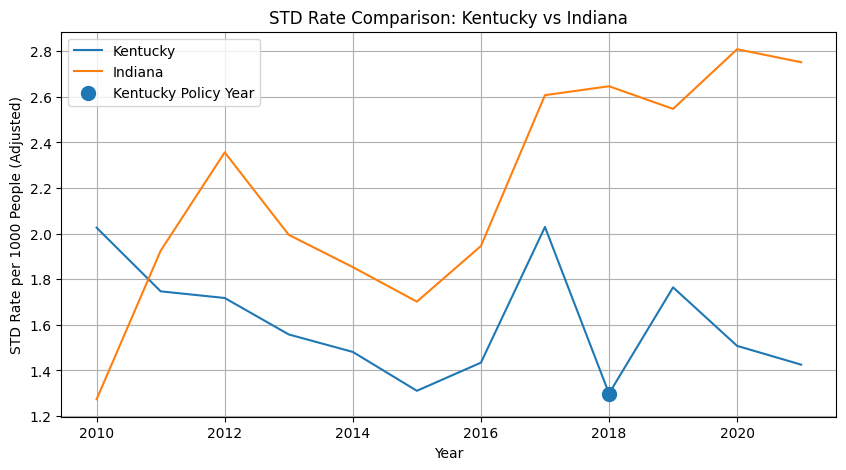

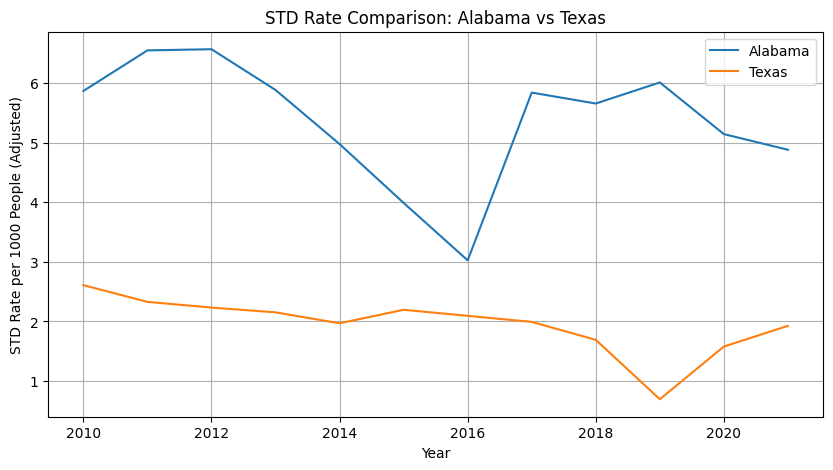

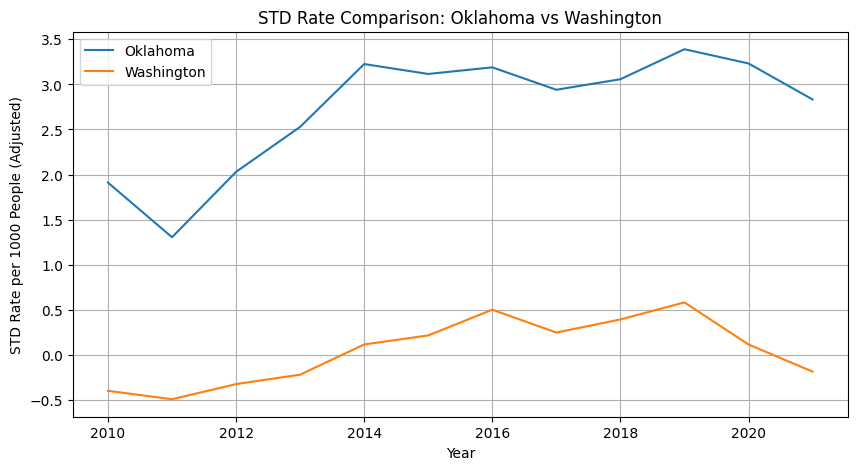

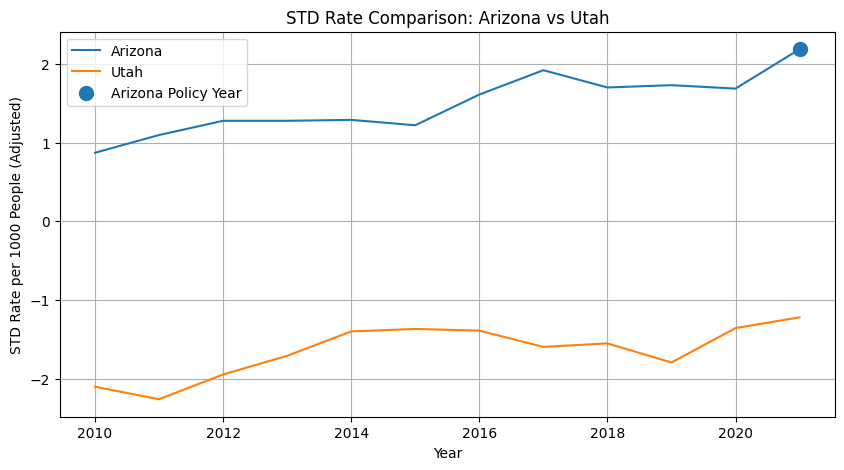

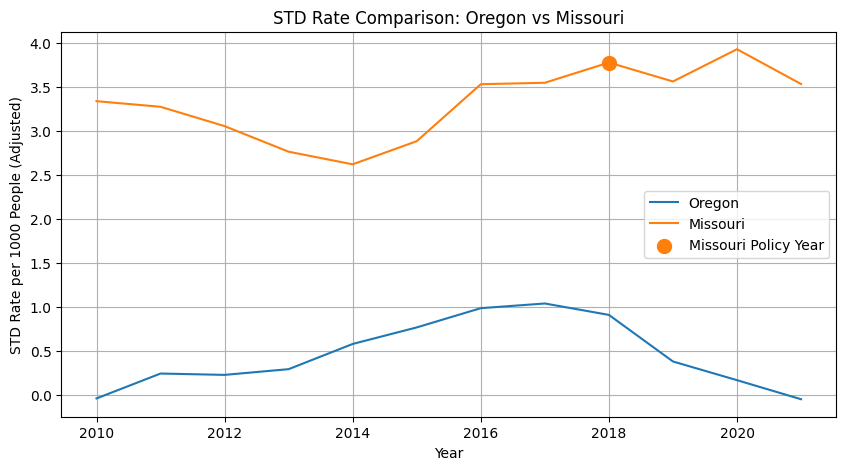

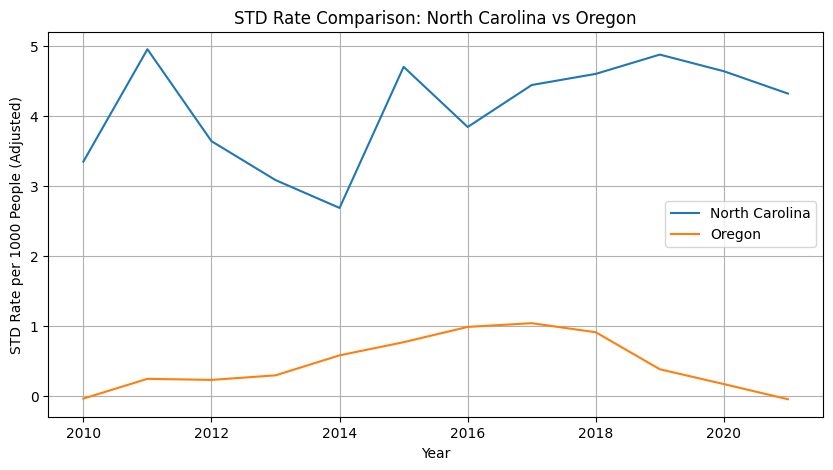

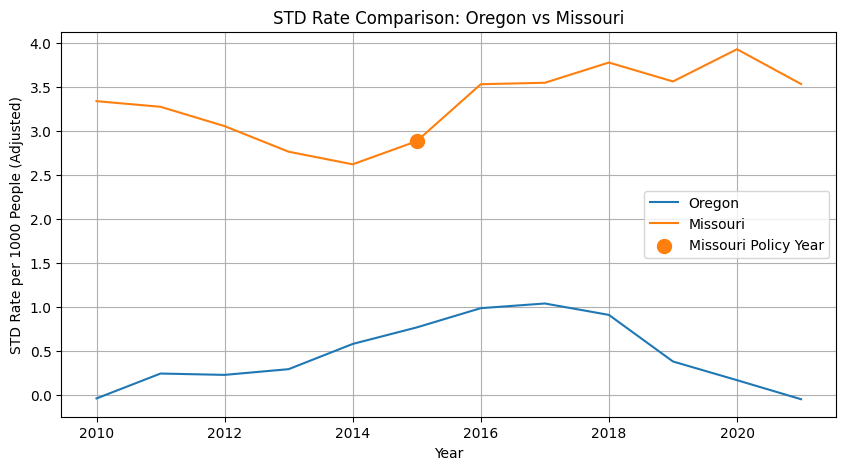

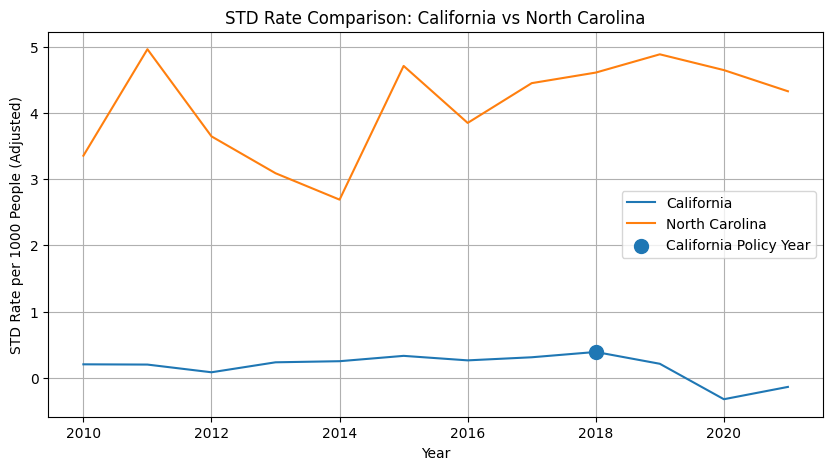

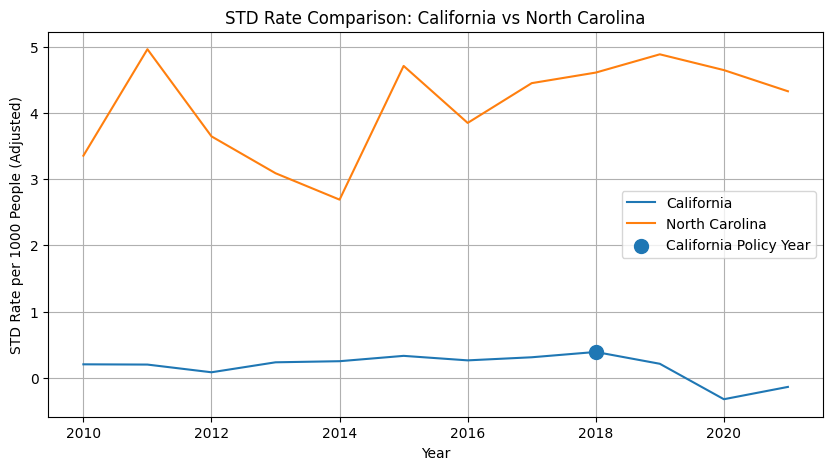

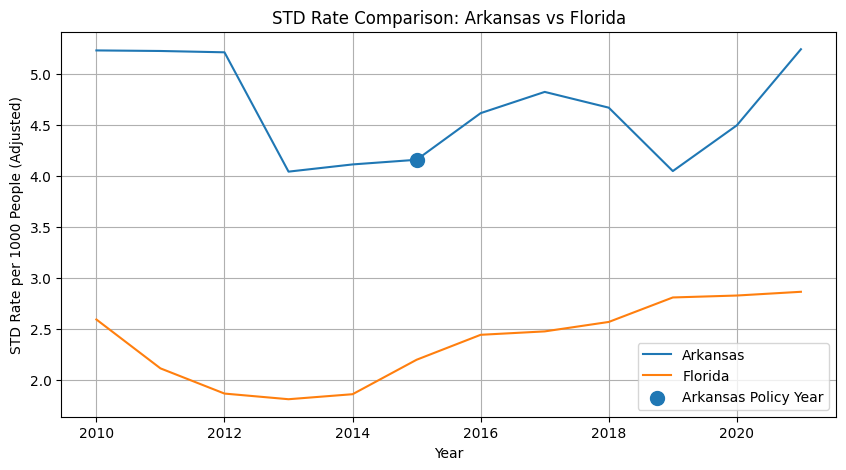

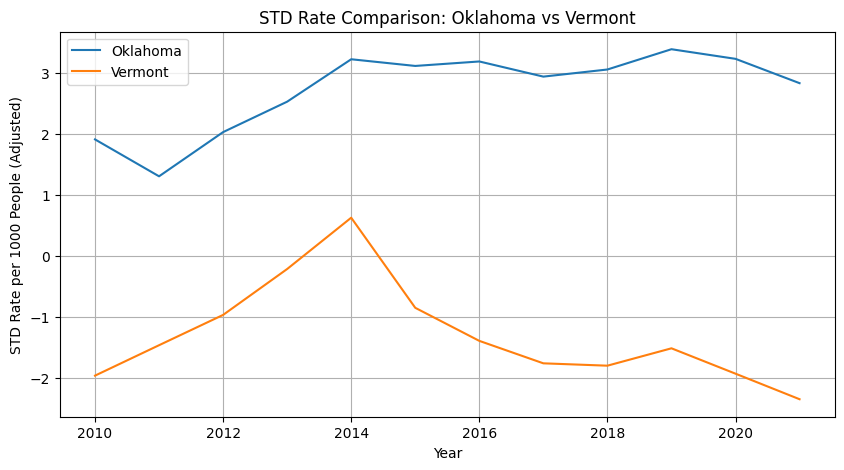

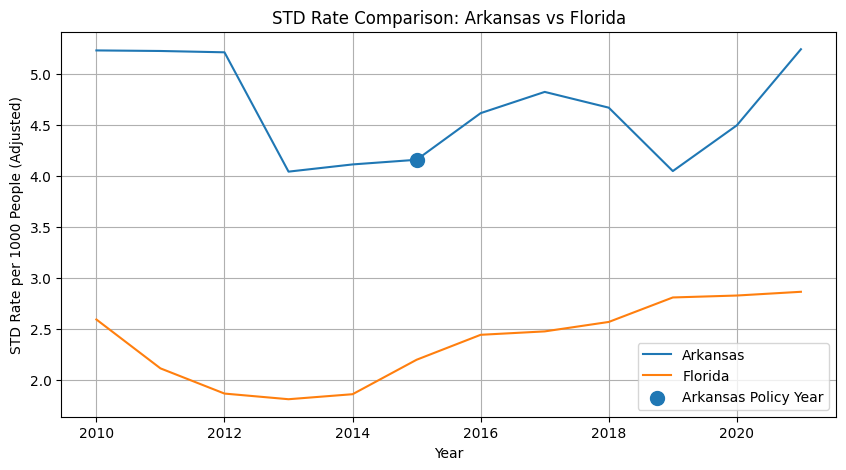

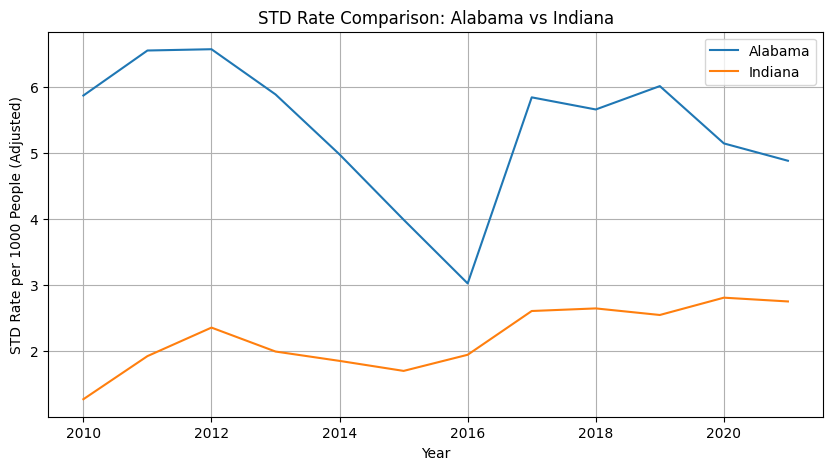

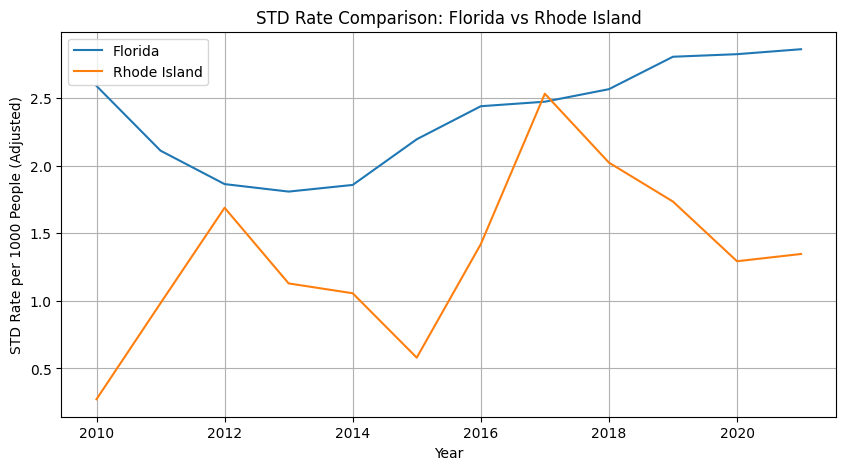

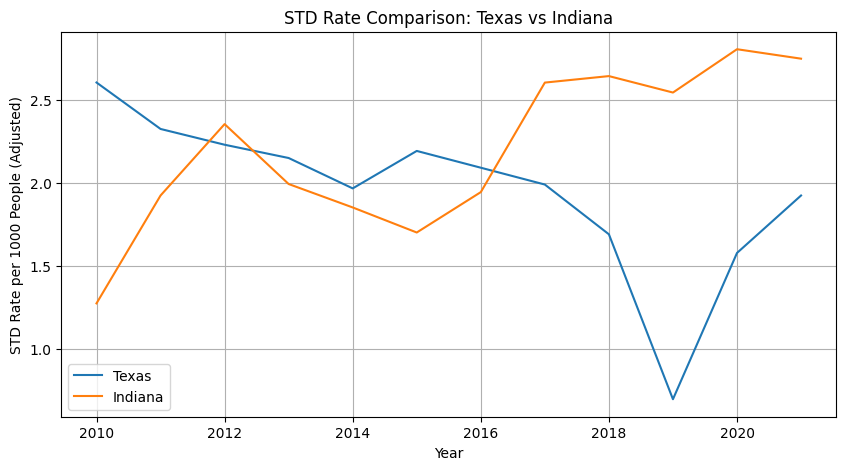

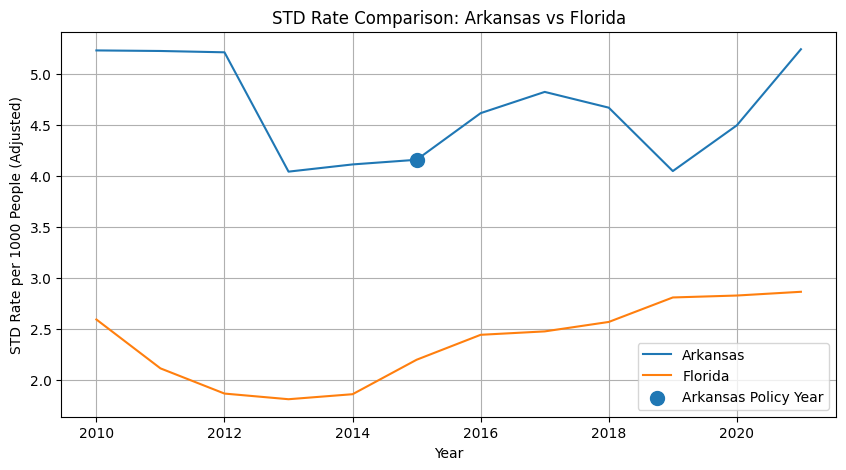

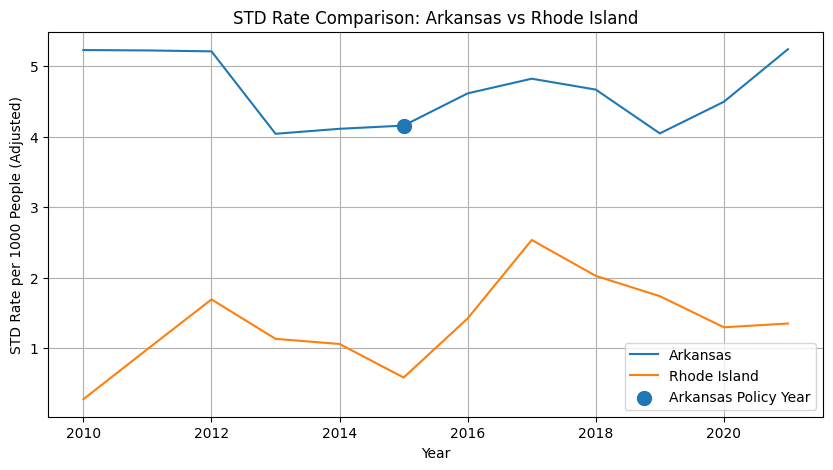

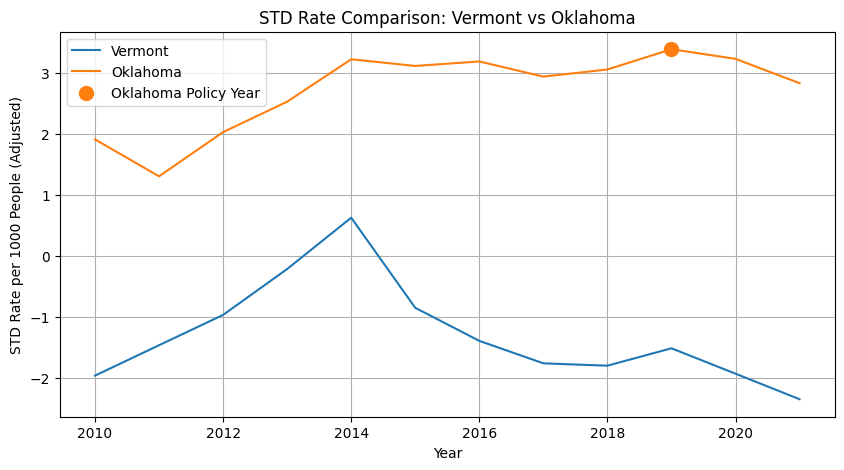

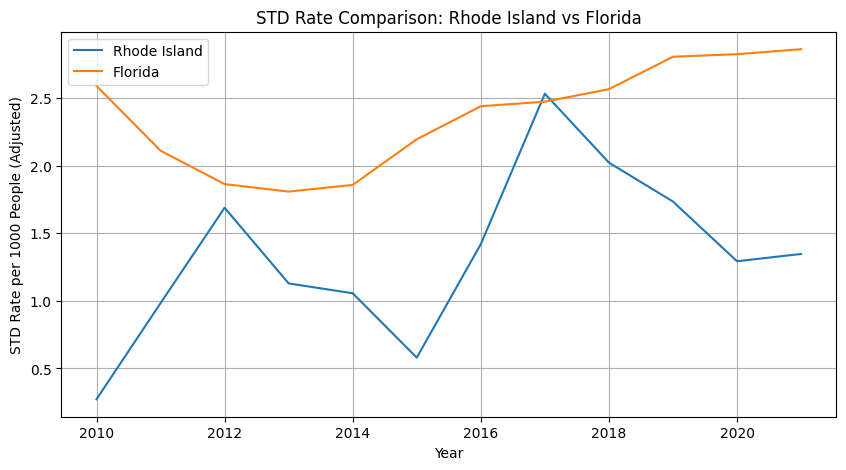

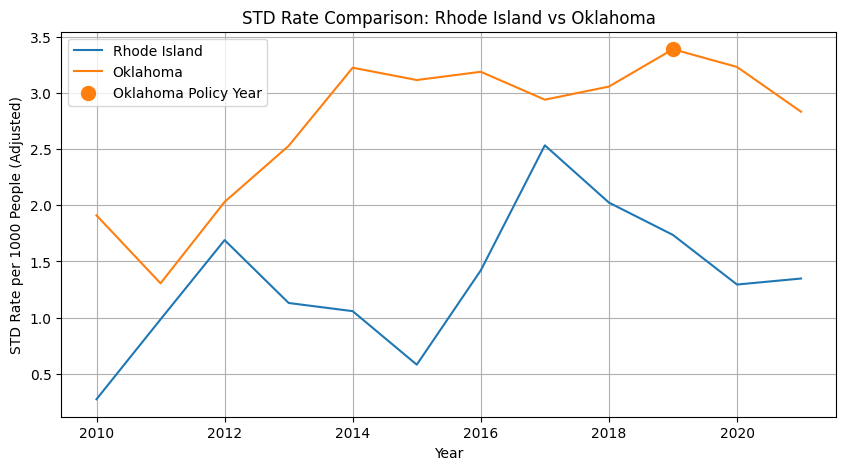

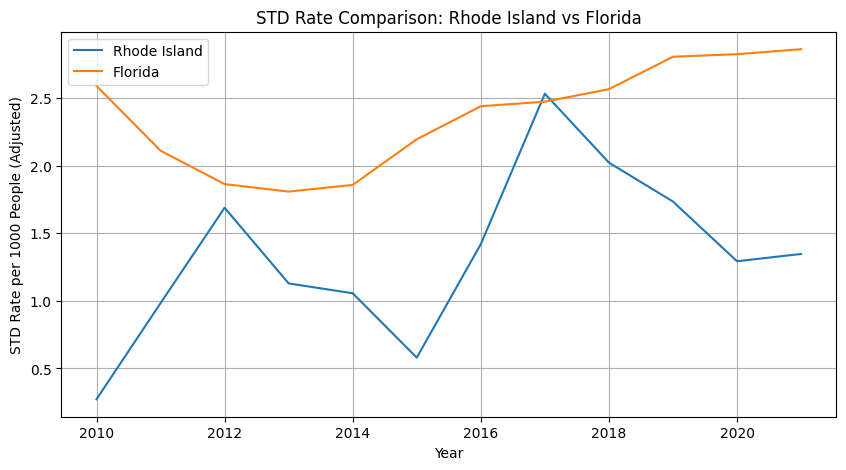

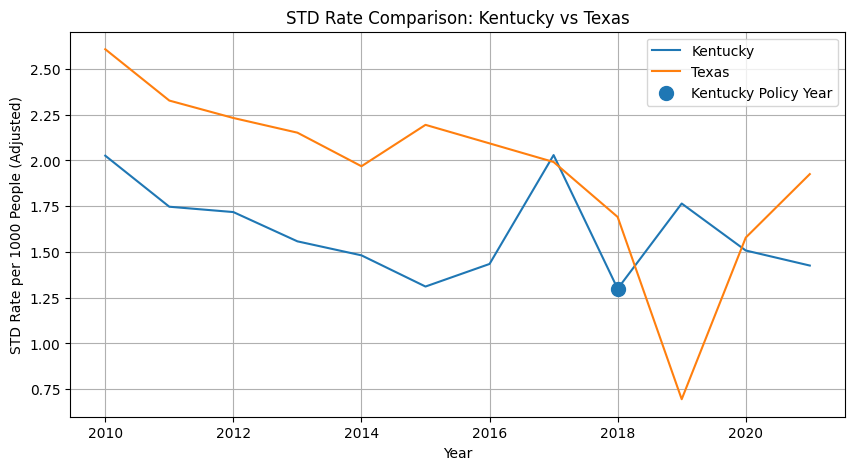

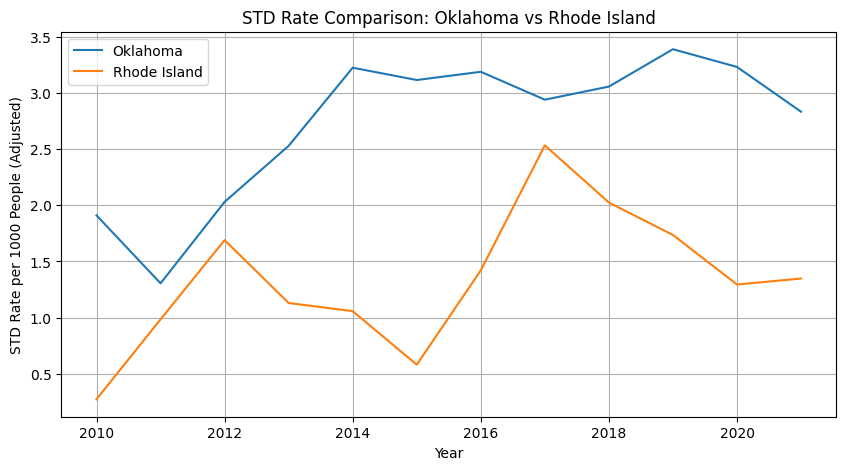

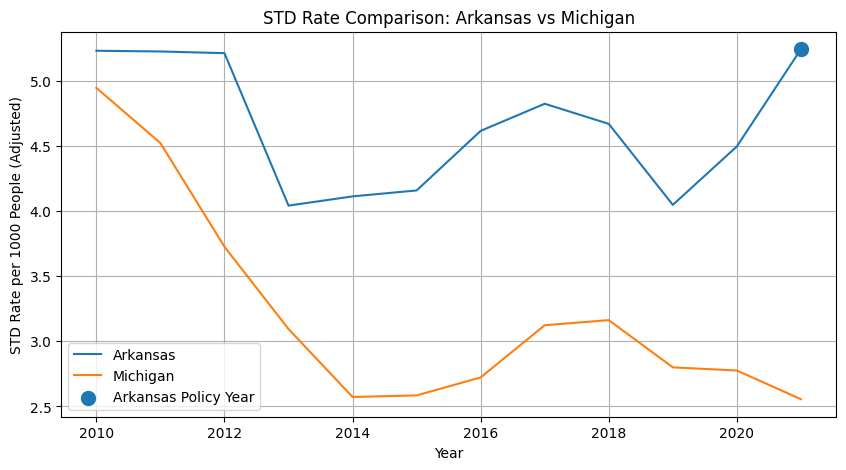

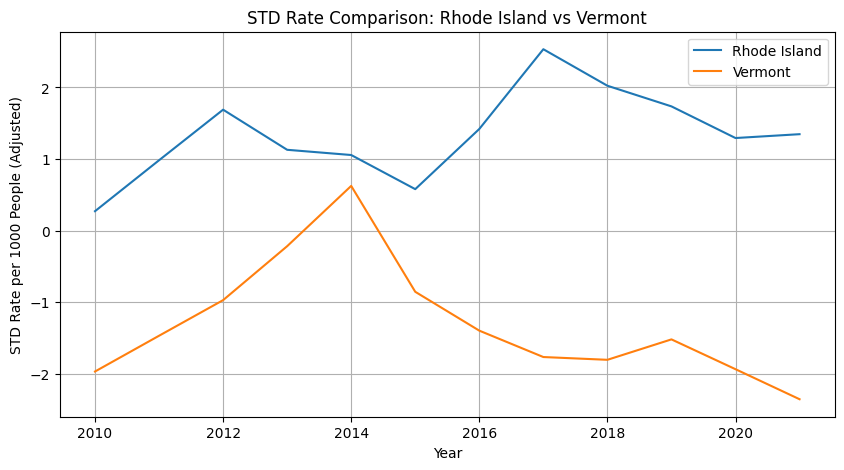

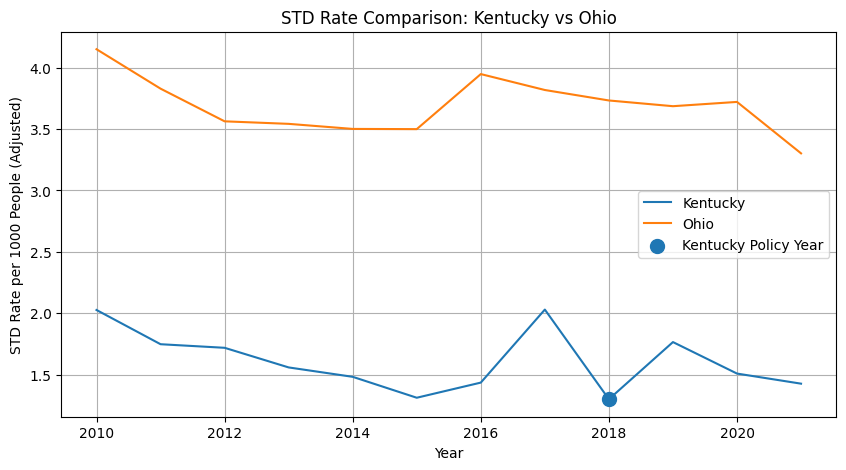

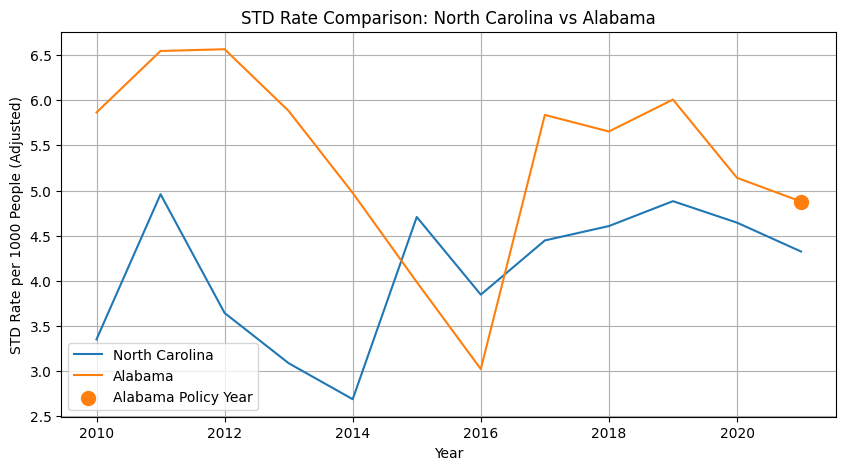

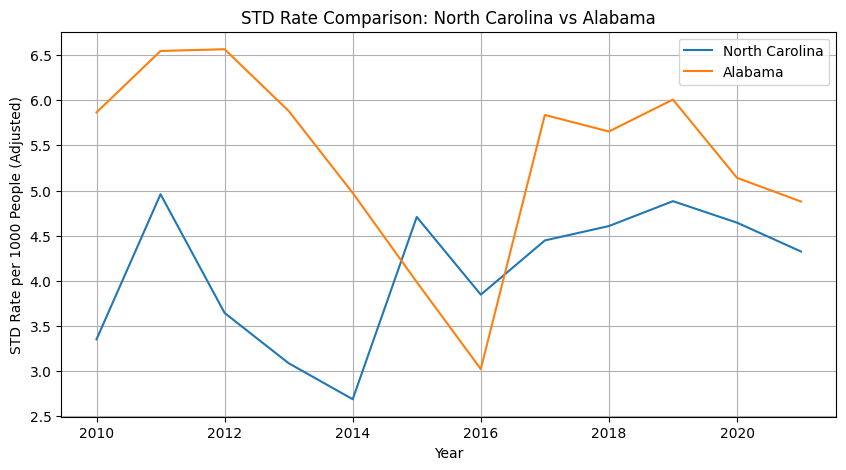

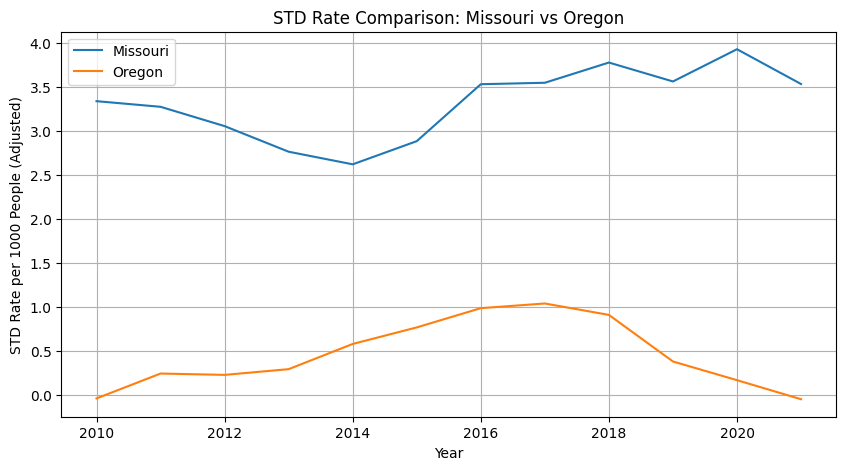

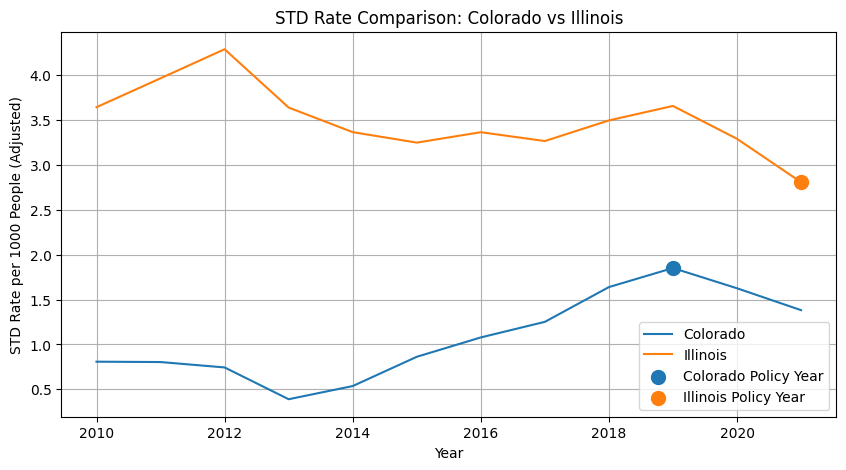

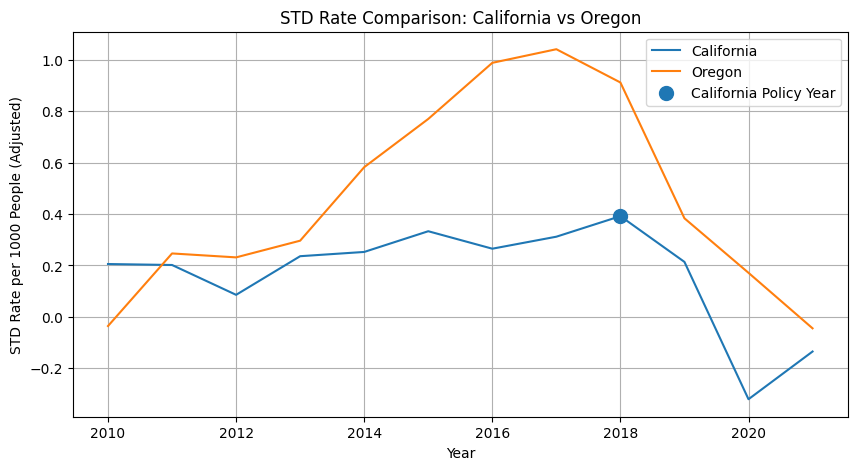

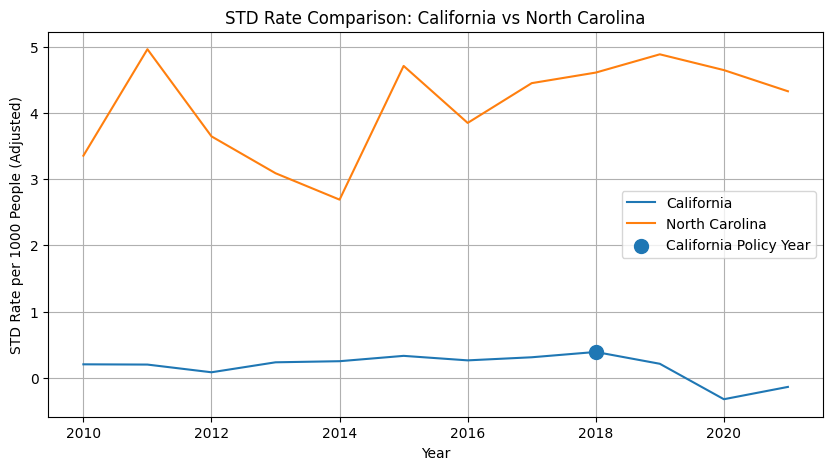

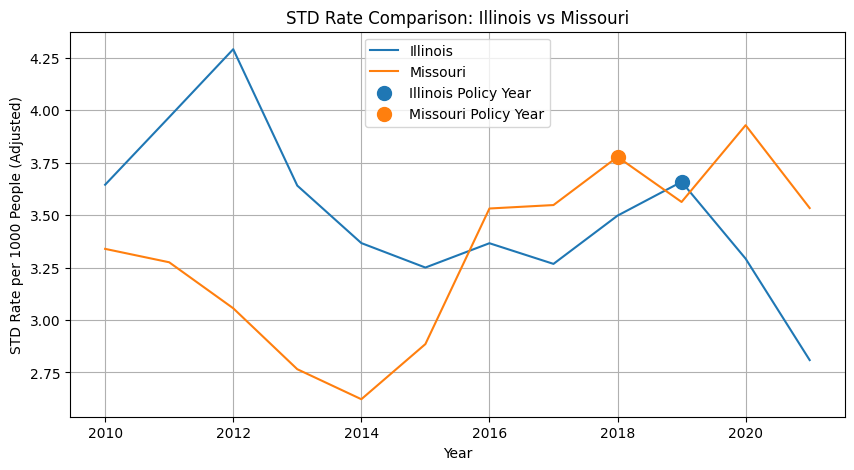

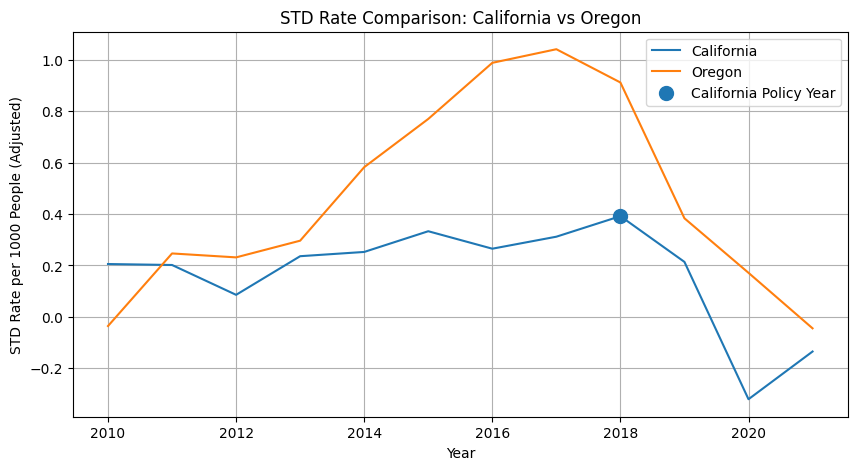

In [ ]:
for (file1, file2), _, _ in top_pairs_with_counts_sorted:
    state1 = file_to_state_map.get(file1, 'Unknown State')
    state2 = file_to_state_map.get(file2, 'Unknown State')
    policy_year1 = file_to_year_map.get(file1, 0)
    policy_year2 = file_to_year_map.get(file2, 0)
    plot_state_comparison(std, state1, state2, policy_year1, policy_year2,'STD Rate per 1000 People (Adjusted)','STD')



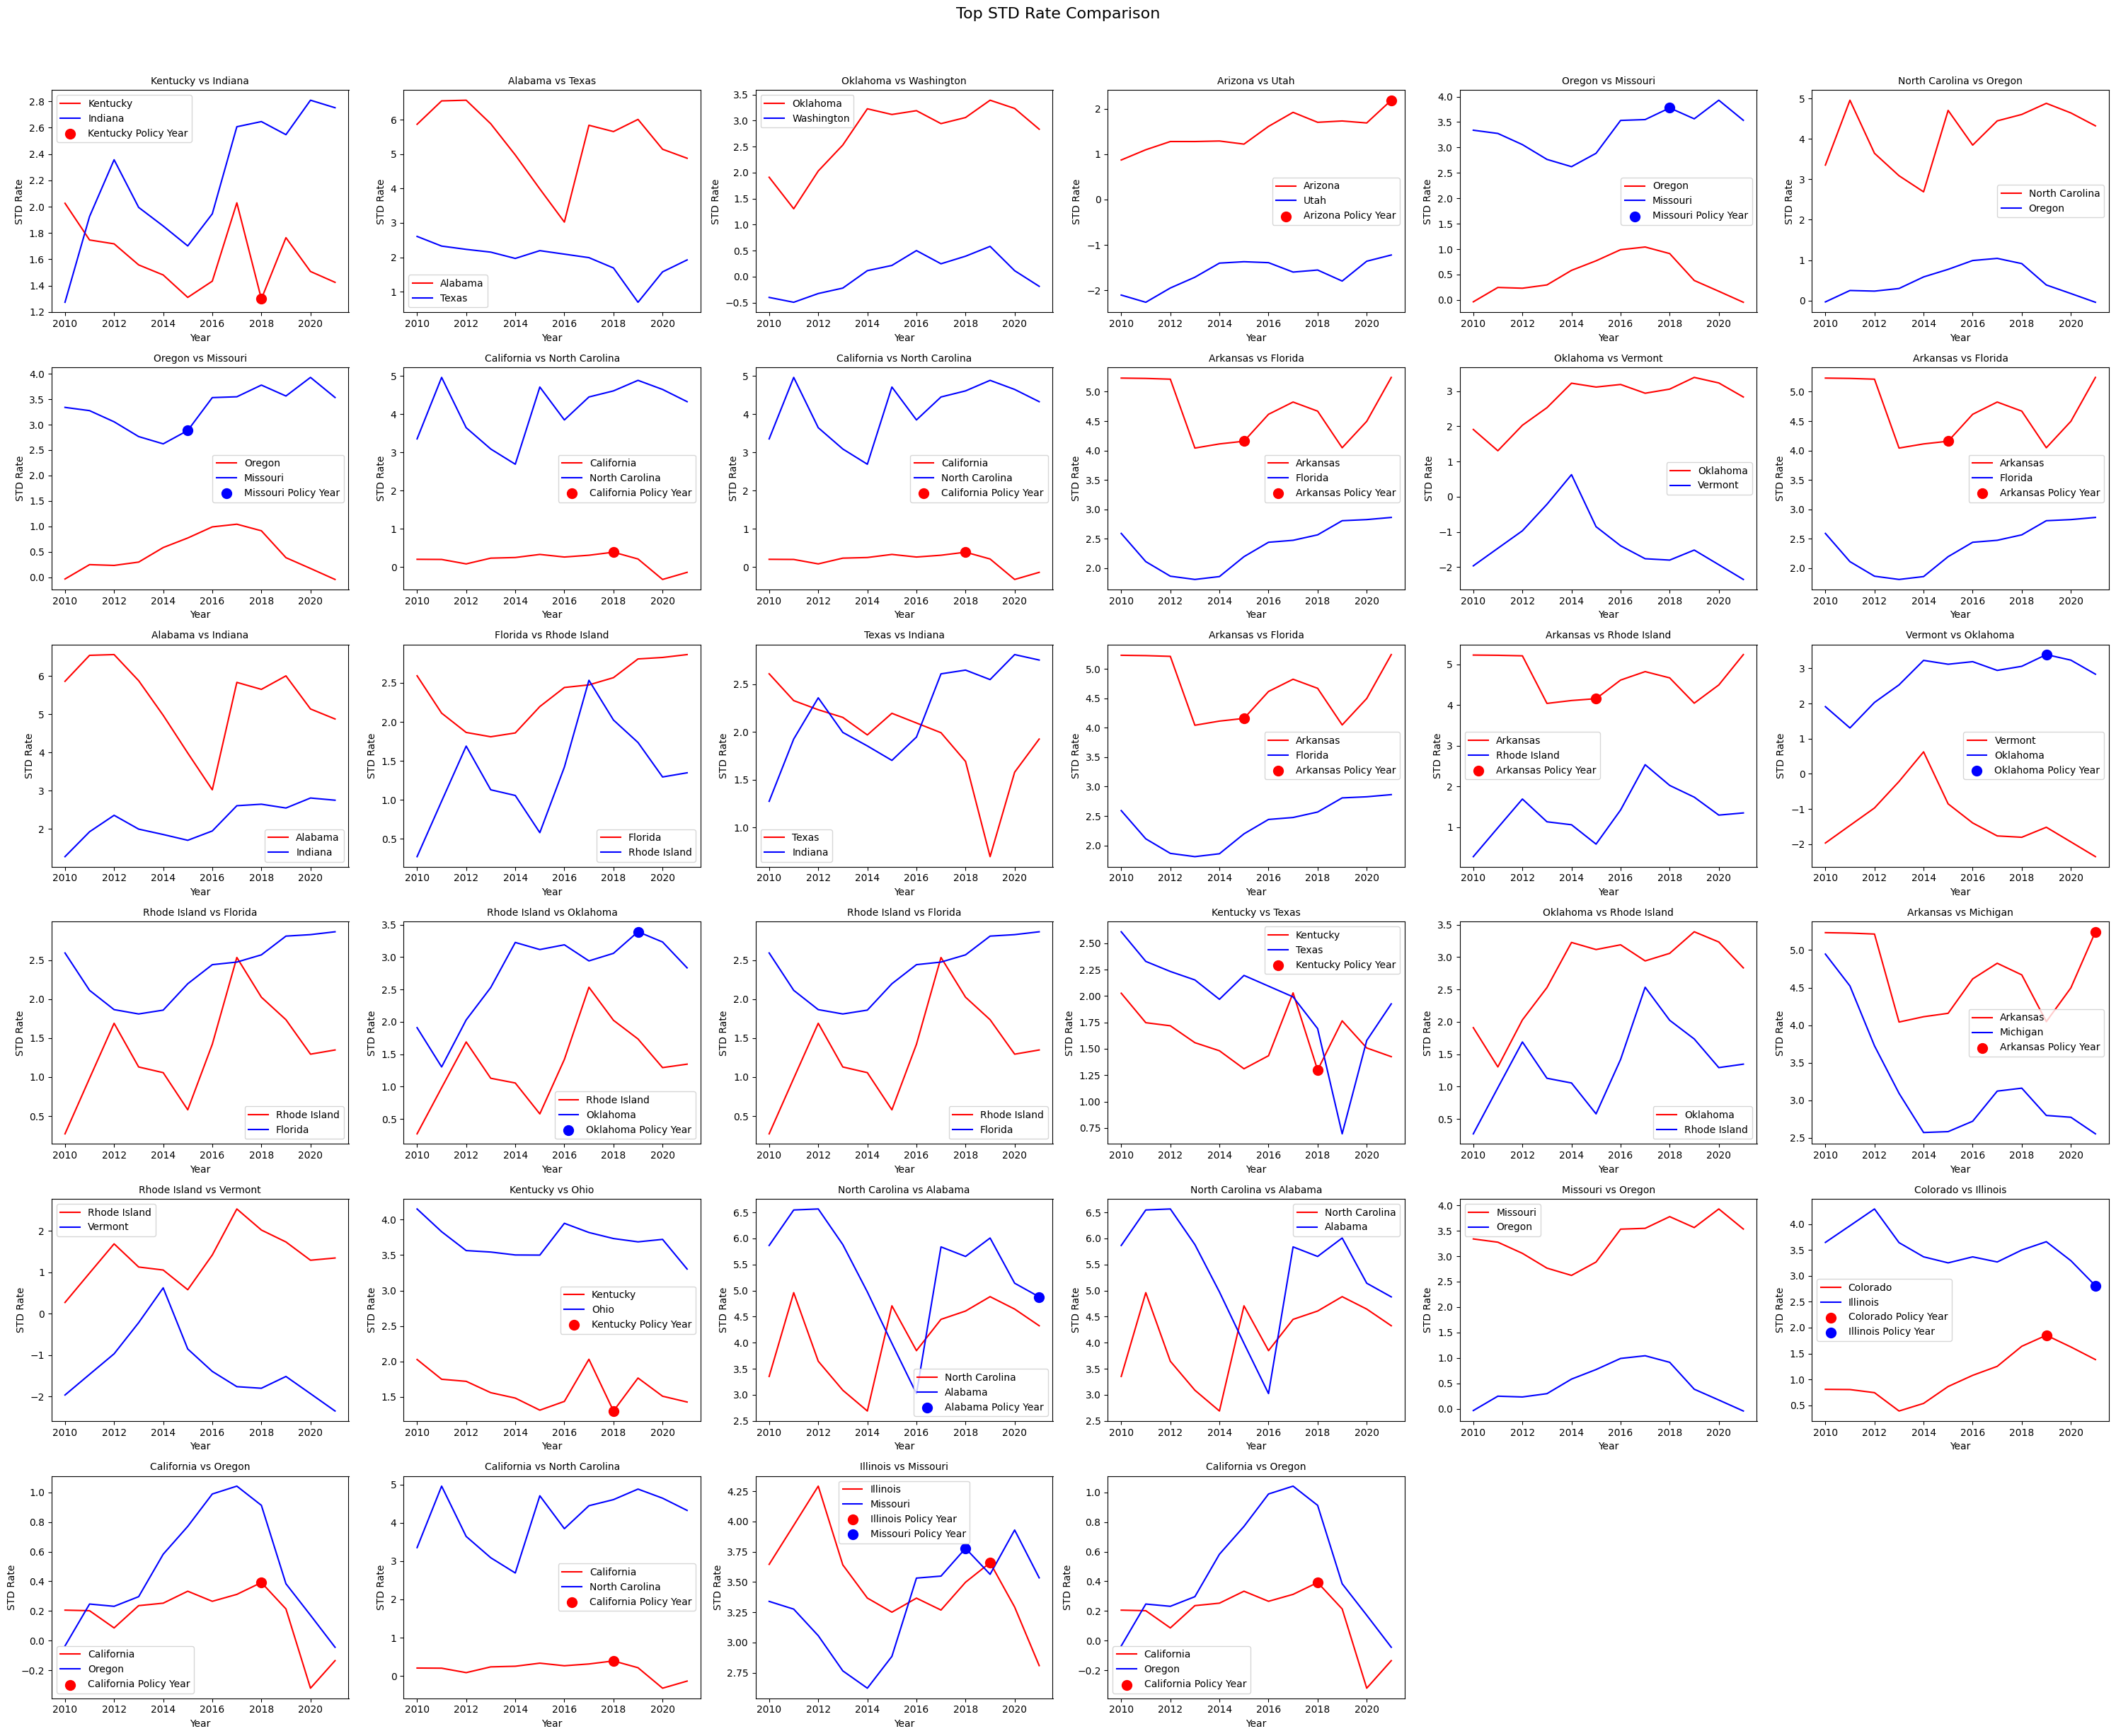

In [ ]:
plot_all_state_comparisons(std, top_pairs_with_counts_sorted, column_name = 'STD Rate per 1000 People (Adjusted)',ylabel = 'STD Rate' , title = 'Top STD Rate Comparison')